In [1]:
import numpy as np
import matplotlib.pyplot as plt

from raml.activations import Identity, Sigmoid, Relu, LeakyRelu, Softmax
from raml.costs import MSE, CrossEntropy, CategoricalCrossEntropy
from raml.metrics import RMSE, CategoricalAccuracy
from raml.layers import Dense
from raml.models import Sequential

from raml.utils import format_data, plot_history
from raml.datasets.load import Wine_Quality, Swedish_Auto_Insurance, Boston_House_Price 
from raml.preprocessing import Normalizer, train_test_split

In [2]:
from raml.datasets.mnist import Mnist

X, Y = Mnist()

# X, Y = Boston_House_Price()

(x_train, x_val, _), (y_train, y_val, _) = \
    train_test_split(X, Y=Y, ratio=[0.4, 0.4, 0.2], shuffle=True, random_seed=7)

# normalizer = Normalizer()
# x_train = normalizer.fit(x_train)
# x_val = normalizer.apply(x_val)

Pulling cashed Mnist


In [3]:
model = Sequential([
    Dense(size=100, input_shape=x_train.shape, activation=LeakyRelu),
    Dense(size=20, activation=LeakyRelu),
    Dense(size=20, activation=LeakyRelu),
    Dense(size=10, activation=Softmax),
])

model.compile(cost=CategoricalCrossEntropy(), metrics=[CategoricalAccuracy()])

val_Loss:0.886, val_CategoricalAccuracy:0.747, Loss:0.614, CategoricalAccuracy:0.812: 100%|██████████| Epochs 5000/5000 [00:28<00:00, 174.34it/s]


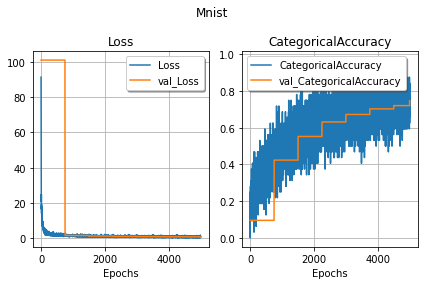

In [4]:
EPOCHS = 5000
history = model.fit(x_train, y_train, epochs=EPOCHS, x_val=x_val, y_val=y_val, batchsize=32)
plot_history(history, title="Mnist", validation=True)

# history = model.fit(x_train, y_train, epochs=EPOCHS, batchsize=32)
# plot_history(history, title="Mnist", validation=False)

# Saves the model to cache. 
model.save()
# Use `model = Sequential.load()` to load the latest model

In [7]:
model.evaluate(x_val, y_val)

0.744375